## The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

## Data Set:

We have 4 individual data sets. Cab_Data.csv, Customer_ID.csv, Transaction_ID.csv and City.csv.

Time period of data is from 31/01/2016 to 31/12/2018.



## Main areas to investigate :

Which company has maximum cab users at a particular time period?

Does margin proportionally increase with increase in number of customers?

What are the attributes of these customer segments?

In [1]:
#import the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#reading the data sets
transaction_ID=pd.read_csv(r"C:\Users\hmeli\OneDrive\Masaüstü\DataGlacierDataSets\Transaction_ID.csv")
CityNames=pd.read_csv(r"C:\Users\hmeli\OneDrive\Masaüstü\DataGlacierDataSets\city.csv")
cab_data=pd.read_csv(r"C:\Users\hmeli\OneDrive\Masaüstü\DataGlacierDataSets\Cab_Data.csv")
customer_ID=pd.read_csv(r"C:\Users\hmeli\OneDrive\Masaüstü\DataGlacierDataSets\Customer_ID.csv")

In [3]:
#take a copy of each dataset 
df_transaction=transaction_ID.copy()
df_customer=customer_ID.copy()
df_city=CityNames.copy()
df_cab=cab_data.copy()

In [4]:
def plot_distribution(inp):
    plt.figure()
    ax=sns.distplot(inp)
    plt.axvline(np.mean(inp), color = "k", linestyle = "dashed", linewidth = 5)
    _, max_= plt.ylim() 
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        " Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure
            

## Aim:
In this step, I have used Descriptive Analysis to explore the properties of the datasets. I have examined and summarized the datasets and features. I've tried to find patterns between features to suggest hypotheses.

In [5]:
#I have examined what kind of variables and relations we have.

#History of transaction ID data
df_transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
df_transaction.tail()

,Transaction ID,Customer ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card


In [7]:
#Structural informations of Transaction_ID dataset.
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [8]:
df_transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [9]:
#Change the object type to Cathegorical type.
df_transaction.Payment_Mode = pd.Categorical(df_transaction.Payment_Mode)

In [10]:
#check whether the object type has changed succsessfully.
df_transaction.dtypes

Transaction ID       int64
Customer ID          int64
Payment_Mode      category
dtype: object

In [11]:
df_transaction["Payment_Mode"].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

In [12]:
df_transaction["Transaction ID"].value_counts()

10000659    1
10031735    1
10027637    1
10029684    1
10039923    1
           ..
10003902    1
10010045    1
10007996    1
10001849    1
10000109    1
Name: Transaction ID, Length: 440098, dtype: int64

In [13]:
#Since the sum equals to 440098, all the Transaction ID value is equal to 1.

df_transaction["Transaction ID"].value_counts().sum()

440098

In [14]:
#Also, I have checked whether there is a duplicate row or not.
#There is no duplicate rows in this data frame.
duplicateDFRow = df_transaction[df_transaction.duplicated()]
print(duplicateDFRow)

Empty DataFrame
Columns: [Transaction ID, Customer ID, Payment_Mode]
Index: []


## Conclusion (First structural results on Transaction_ID dataset): 

There is no NA value in Transaction_ID dataset and there is no duplicate row in this data frame.

"Payment_Mode" is an object type variable, I've changed it to categorical variable and checked whether the transformation is successful. 

Also, I have found the number of the card users and cash users, I will use this information in next stages. 

In [15]:
#History of Customer data.
df_customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [16]:
df_customer.tail()

,Customer ID,Gender,Age,Income (USD/Month)
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


In [17]:
#Structural informations of Customer dataset.
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [18]:
df_customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [19]:
#Change the object type to Cathegorical type.
df_customer.Gender = pd.Categorical(df_customer.Gender)

In [20]:
df_customer.dtypes

Customer ID              int64
Gender                category
Age                      int64
Income (USD/Month)       int64
dtype: object

In [21]:
#There is no duplicate rows in this data frame.
duplicateDFRow2 = df_customer[df_customer.duplicated()]
print(duplicateDFRow2)

Empty DataFrame
Columns: [Customer ID, Gender, Age, Income (USD/Month)]
Index: []


In [22]:
#Checking the frequency of customers. 
df_customer["Customer ID"].value_counts()

2049     1
20607    1
37639    1
58121    1
51980    1
        ..
28039    1
5512     1
7561     1
1418     1
2047     1
Name: Customer ID, Length: 49171, dtype: int64

In [23]:
df_customer["Customer ID"].value_counts().sum()

49171

## Comment on Customer_ID variable:

All the Customer_ID numbers are different since we obtain 49171 when we add them.
This means that cab users have different ID numbers whether or not they are the same person. 

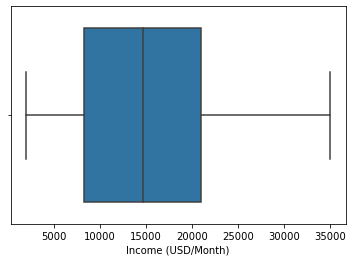

In [24]:
#check whether is there any outliers in income values. As seen below, there is no outlier.
sns.boxplot(x=df_customer["Income (USD/Month)"]);

<AxesSubplot:xlabel='Age'>

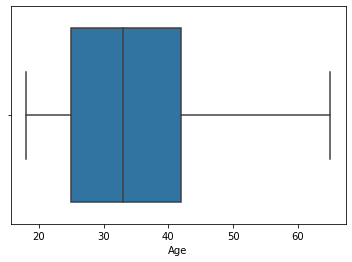

In [25]:
sns.boxplot(x=df_customer["Age"])

In [26]:
type(df_customer["Income (USD/Month)"])

pandas.core.series.Series

In [27]:
(df_customer["Income (USD/Month)"]).to_numpy

<bound method IndexOpsMixin.to_numpy of 0        10813
1         9237
2        11242
3        23327
4         8536
         ...  
49166    18713
49167    15346
49168     3960
49169    19454
49170    10128
Name: Income (USD/Month), Length: 49171, dtype: int64>

C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


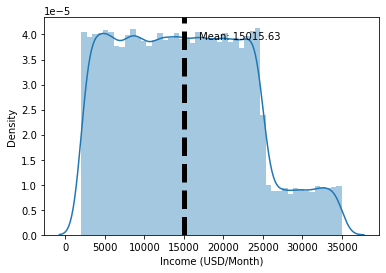

In [28]:
plot_distribution(df_customer["Income (USD/Month)"]);

## Conclusion (First structural results on Customer dataset): 

There is no NA value and duplicate row in Customer dataset. 

"Gender" is an object type variable, I've changed it to categorical variable and checked whether the transformation is successful. 

Also, there is no outlier in Age and Income datas. I have used boxplot to determine them. 

I have found the mean value of the Income and plot the distribution curve.

# What is the relationships across the files and how can we explain the relations?

## What kind of relation(s) do we have between Payment_mode and Income\Gender\Age?

In [79]:
#Join some of the features that belong to two data sets df_customer and df_transaction for further investigation.

df_1=pd.concat([df_customer["Income (USD/Month)"], df_customer["Age"], df_customer["Gender"], df_transaction["Payment_Mode"]] 
               ,axis=1)

In [30]:
df_1.head()

,Income (USD/Month),Age,Gender,Payment_Mode
0,10813.0,28.0,Male,Card
1,9237.0,27.0,Male,Card
2,11242.0,53.0,Male,Cash
3,23327.0,23.0,Male,Cash
4,8536.0,33.0,Male,Card


In [31]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Income (USD/Month)  49171 non-null   float64 
 1   Age                 49171 non-null   float64 
 2   Gender              49171 non-null   category
 3   Payment_Mode        440098 non-null  category
dtypes: category(2), float64(2)
memory usage: 7.6 MB


In [32]:
df_1.isnull().sum()

Income (USD/Month)    390927
Age                   390927
Gender                390927
Payment_Mode               0
dtype: int64

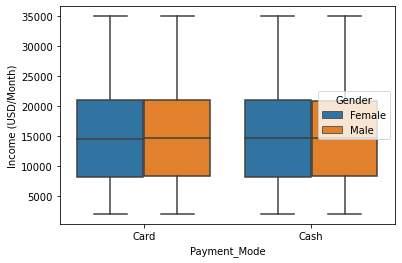

In [33]:
#Relation between payment mode and Income with respect to gender level.
sns.boxplot(x= "Payment_Mode", y= "Income (USD/Month)", hue= "Gender", data=df_1);

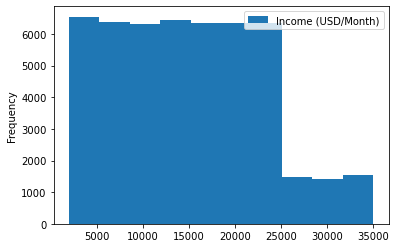

In [34]:
pd.DataFrame(df_1["Income (USD/Month)"]).plot.hist();

In [35]:
df_1["Income (USD/Month)"].mean()

15015.631856175389

## Comment: 

It is heavily right-skewed. The rate of those whose salary is higher than 25000 USD/Month is lower than those whose 
salary is lower than 25000 USD/Month.  

## Note:

While concatenating the columns, NA values occur. Especially on Income feature. If I fill the NA values in Income column with its mean value, then  its histogram graph changes, and so is the distribution. Since the characteristic of the data changes, I've decided to ignore the NA values that happens after concatenation.  

# What is the relationships across the files and how can we explain the relations?

In [80]:
#To see the relation via "Company", I have added "Company" column from df_cab dataset.
df_1["Company"]=df_cab["Company"]
df_1.head()

,Income (USD/Month),Age,Gender,Payment_Mode,Company
0,10813.0,28.0,Male,Card,Pink Cab
1,9237.0,27.0,Male,Card,Pink Cab
2,11242.0,53.0,Male,Cash,Pink Cab
3,23327.0,23.0,Male,Cash,Pink Cab
4,8536.0,33.0,Male,Card,Pink Cab


In [37]:
#I checked whether there is NA values in the new data frame.
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Income (USD/Month)  49171 non-null   float64 
 1   Age                 49171 non-null   float64 
 2   Gender              49171 non-null   category
 3   Payment_Mode        440098 non-null  category
 4   Company             359392 non-null  object  
dtypes: category(2), float64(2), object(1)
memory usage: 10.9+ MB


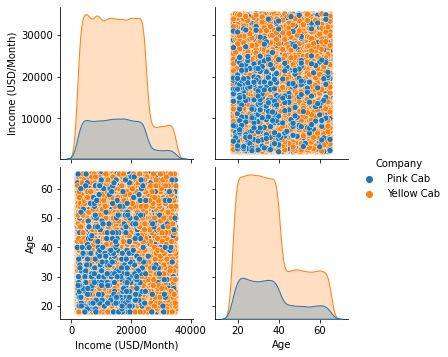

In [38]:
sns.pairplot(df_1, hue= "Company");

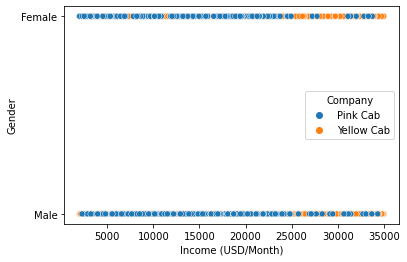

In [39]:
sns.scatterplot(x="Income (USD/Month)", y="Gender", hue = "Company", data=df_1);

## Question set 1: 
By looking at the scatterplot graph, we can ask:

1) As income increases, do females prefer to use Yellow cab.

2) The users whose income are greater than 25000 USD/Month prefer to use Yellow cab.

<AxesSubplot:title={'center':'Income (USD/Month)'}, xlabel='Company'>

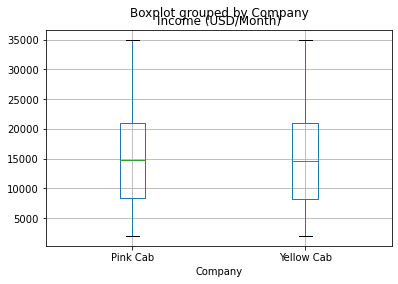

In [40]:
df_1.boxplot("Income (USD/Month)", by= "Company")

C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


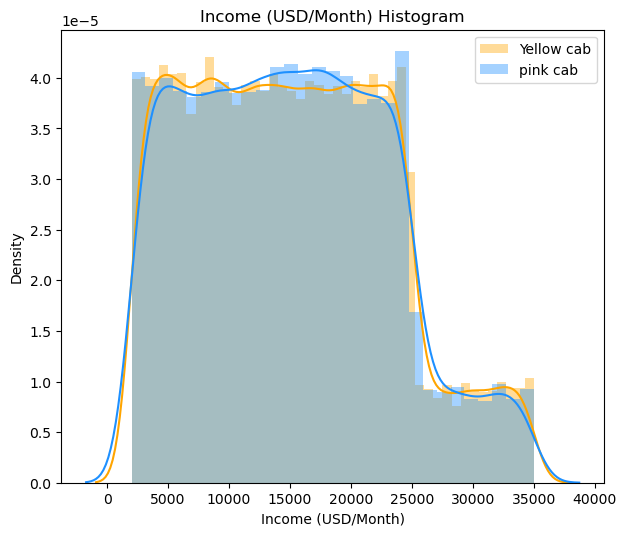

In [41]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df_1.loc[df_1.Company=='Yellow Cab', "Income (USD/Month)"] , color="orange", label="Yellow cab")
sns.distplot( df_1.loc[df_1.Company=="Pink Cab", "Income (USD/Month)"] , color="dodgerblue", label="pink cab")

plt.title('Income (USD/Month) Histogram')
plt.legend();

As the graph suggests we can create the following hypotheses:

## Hypothesis 1)  

H0: The mean values of the incomes of the Yellow cab users and Pink cab users are equal.

H1: The mean values of the incomes of the Yellow cab users and Pink cab users are not equal.                      

I have computed the mean values of the Incomes of the Yellow cab users' and Pink cab users', respectively.

In [42]:
df_1_yellow=df_1[df_1["Company"]=="Yellow Cab"]

In [43]:
df_1_yellow["Income (USD/Month)"].mean()

15019.52430582562

In [44]:
df_1_yellow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274681 entries, 233 to 359391
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Income (USD/Month)  38571 non-null   float64 
 1   Age                 38571 non-null   float64 
 2   Gender              38571 non-null   category
 3   Payment_Mode        274681 non-null  category
 4   Company             274681 non-null  object  
dtypes: category(2), float64(2), object(1)
memory usage: 8.9+ MB


In [45]:
#Mean value of the incomes of Pink company users.
df_1_pink=df_1[df_1["Company"]=="Pink Cab"]
df_1_pink["Income (USD/Month)"].mean()

15001.468113207548

In [46]:
df_1_pink.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84711 entries, 0 to 357453
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Income (USD/Month)  10600 non-null  float64 
 1   Age                 10600 non-null  float64 
 2   Gender              10600 non-null  category
 3   Payment_Mode        84711 non-null  category
 4   Company             84711 non-null  object  
dtypes: category(2), float64(2), object(1)
memory usage: 2.7+ MB


## Deciding what to do on Hypothesis :

In [47]:
from statsmodels.formula.api import ols 
import statsmodels.api as sm

In [48]:
mod= ols('(df_1["Income (USD/Month)"] ~ df_1["Company"])', data=df_1).fit()
aov_table= sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                       sum_sq       df         F    PR(>F)
df_1["Company"]  2.710879e+06      1.0  0.042333  0.836987
Residual         3.148615e+12  49169.0       NaN       NaN


## Result of the Hypothesis 1:

I plotted the pairplot graph and as graph suggests I have computed the mean values of the Incomes of the Pink cab company and Yellow cab company. 

And also as a result of ANOVA test the p-value is greater than 0.05. Hence, we can not reject the null hypothesis H0.
This means that there is no significant difference between the mean values of the income's between Yellow and Pink cab companies.

In [49]:
df_1_upper_pink= df_1_pink[df_1_pink["Income (USD/Month)"]> 25.000]
df_1_upper_pink.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10600 entries, 0 to 49170
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Income (USD/Month)  10600 non-null  float64 
 1   Age                 10600 non-null  float64 
 2   Gender              10600 non-null  category
 3   Payment_Mode        10600 non-null  category
 4   Company             10600 non-null  object  
dtypes: category(2), float64(2), object(1)
memory usage: 352.2+ KB


In [50]:
df_1_upper_pink.head()

,Income (USD/Month),Age,Gender,Payment_Mode,Company
0,10813.0,28.0,Male,Card,Pink Cab
1,9237.0,27.0,Male,Card,Pink Cab
2,11242.0,53.0,Male,Cash,Pink Cab
3,23327.0,23.0,Male,Cash,Pink Cab
4,8536.0,33.0,Male,Card,Pink Cab


In [51]:
df_1_upper_yellow= df_1_yellow[df_1_yellow["Income (USD/Month)"]> 25.000]
df_1_upper_yellow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38571 entries, 233 to 48814
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Income (USD/Month)  38571 non-null  float64 
 1   Age                 38571 non-null  float64 
 2   Gender              38571 non-null  category
 3   Payment_Mode        38571 non-null  category
 4   Company             38571 non-null  object  
dtypes: category(2), float64(2), object(1)
memory usage: 1.3+ MB


In [52]:
df_1_upper_yellow.head()

,Income (USD/Month),Age,Gender,Payment_Mode,Company
233,11254.0,32.0,Male,Card,Yellow Cab
234,28449.0,55.0,Male,Card,Yellow Cab
235,7016.0,33.0,Male,Cash,Yellow Cab
236,15321.0,56.0,Male,Card,Yellow Cab
237,10914.0,35.0,Male,Cash,Yellow Cab


In [53]:
df_1_upper_pink["Gender"].value_counts()

Male      5735
Female    4865
Name: Gender, dtype: int64

In [54]:
df_1_upper_yellow["Gender"].value_counts()

Male      20827
Female    17744
Name: Gender, dtype: int64

In [55]:
total_upper = (df_1_upper_pink["Gender"].value_counts().sum() + df_1_upper_yellow["Gender"].value_counts().sum())

In [56]:
df_1_upper_pink["Gender"].value_counts() / total_upper

Male      0.116634
Female    0.098940
Name: Gender, dtype: float64

In [57]:
df_1_upper_yellow["Gender"].value_counts() / total_upper

Male      0.423563
Female    0.360863
Name: Gender, dtype: float64

## Answers to the question set 1:

## 1) As income increases, do females choose to use Yellow cab.

As seen above rates, between the users whose income is greater than 25.000, male users' percentage is higher than female users'. 

## 2) The users whose income are less than 25000 USD/Month prefer to use Pink cab.

Although, the mean values of the incomes between two cab companies are not significantly different, 
the users whose incomes > 25.000 prefer to use Yellow cab.



## Hypothesis 2 :

H0: Yellow Cab's Age average is equal to Pink Cab's Age average.

H1: Yellow Cab's Age average is not equal to Pink Cab's Age average.

<AxesSubplot:title={'center':'Age'}, xlabel='Company'>

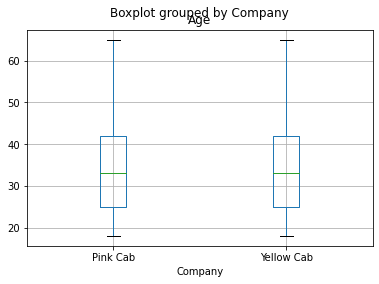

In [58]:
df_1.boxplot("Age", by= "Company")

C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


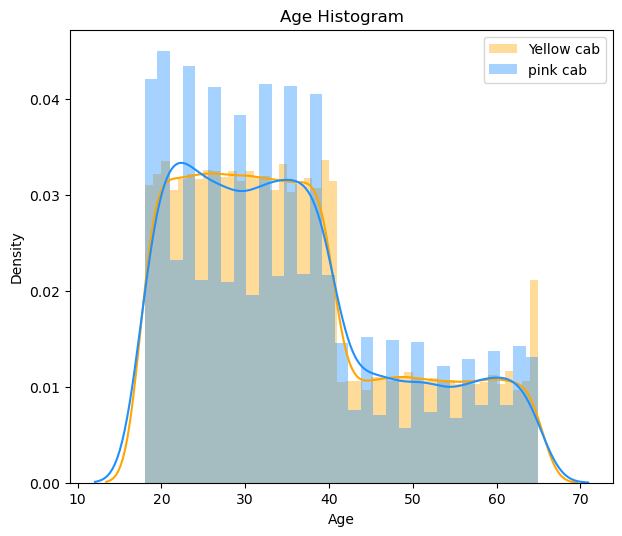

In [59]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df_1.loc[df_1.Company=='Yellow Cab', "Age"] , color="orange", label="Yellow cab")
sns.distplot( df_1.loc[df_1.Company=="Pink Cab", "Age"] , color="dodgerblue", label="pink cab")

plt.title('Age Histogram')
plt.legend();

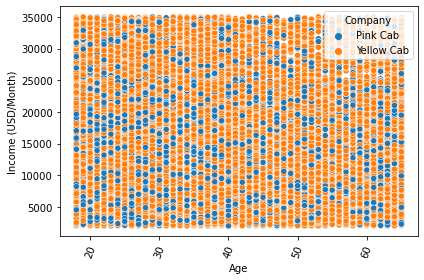

In [60]:
sns.scatterplot(x="Age", y="Income (USD/Month)", hue="Company", data=df_1)
plt.xticks(rotation=70)
plt.tight_layout()

Although the scatter plot suggests that the cab users whose age are <=40 prefers pink cab,
the mean value of pink and yellow cab users' age is close to each other.

In [61]:
df_1_yellow["Age"].mean()

35.38575613803116

In [62]:
df_1_pink["Age"].mean()

35.28075471698113

In [63]:
#The mean values are too close, since I thought that the number of the blue points are bigger than yellow's where age <=40,  
#I have examined whether can we categorize the age group which prefers Yellow cab and Pink cab. 
df_1_upper_age_y= df_1_yellow[df_1_yellow["Age"] > 40]
df_1_upper_age_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10291 entries, 234 to 48814
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Income (USD/Month)  10291 non-null  float64 
 1   Age                 10291 non-null  float64 
 2   Gender              10291 non-null  category
 3   Payment_Mode        10291 non-null  category
 4   Company             10291 non-null  object  
dtypes: category(2), float64(2), object(1)
memory usage: 341.9+ KB


In [64]:
df_1_upper_age_p= df_1_pink[df_1_pink["Age"] > 40]
df_1_upper_age_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831 entries, 2 to 49165
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Income (USD/Month)  2831 non-null   float64 
 1   Age                 2831 non-null   float64 
 2   Gender              2831 non-null   category
 3   Payment_Mode        2831 non-null   category
 4   Company             2831 non-null   object  
dtypes: category(2), float64(2), object(1)
memory usage: 94.2+ KB


In [65]:
total_upper_age= df_1_upper_age_p= (df_1_pink[df_1_pink["Age"] > 40].value_counts().sum() + df_1_yellow[df_1_yellow["Age"] > 40].value_counts().sum())
total_upper_age

13122

In [66]:
df_1_pink[df_1_pink["Age"] > 40].value_counts().sum() / total_upper_age

0.21574455113549765

In [67]:
df_1_yellow[df_1_yellow["Age"] > 40].value_counts().sum() / total_upper_age

0.7842554488645024

In [68]:
df_1_lower_age_y= df_1_yellow[df_1_yellow["Age"]<= 40]
df_1_lower_age_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28280 entries, 233 to 48813
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Income (USD/Month)  28280 non-null  float64 
 1   Age                 28280 non-null  float64 
 2   Gender              28280 non-null  category
 3   Payment_Mode        28280 non-null  category
 4   Company             28280 non-null  object  
dtypes: category(2), float64(2), object(1)
memory usage: 939.2+ KB


In [69]:
df_1_lower_age_p= df_1_pink[df_1_pink["Age"] <= 40]
df_1_lower_age_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7769 entries, 0 to 49170
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Income (USD/Month)  7769 non-null   float64 
 1   Age                 7769 non-null   float64 
 2   Gender              7769 non-null   category
 3   Payment_Mode        7769 non-null   category
 4   Company             7769 non-null   object  
dtypes: category(2), float64(2), object(1)
memory usage: 258.2+ KB


In [70]:
total_lower_age= df_1_lower_age_p= (df_1_pink[df_1_pink["Age"] <= 40].value_counts().sum() + df_1_yellow[df_1_yellow["Age"] <= 40].value_counts().sum())
total_lower_age

36049

In [71]:
df_1_pink[df_1_pink["Age"]<= 40].value_counts().sum() / total_lower_age

0.21551221947904242

In [72]:
df_1_yellow[df_1_yellow["Age"]<= 40].value_counts().sum() / total_lower_age

0.7844877805209576

The mean values are too close, so we can not conclude that the users of age group <= 40 prefers Pink cab.

In [73]:
mod2= ols('(df_1["Age"] ~ df_1["Company"])', data=df_1).fit()
aov_table= sm.stats.anova_lm(mod2, typ=2)
print(aov_table)

                       sum_sq       df         F    PR(>F)
df_1["Company"]  9.167440e+01      1.0  0.577521  0.447289
Residual         7.804980e+06  49169.0       NaN       NaN


## Result of the Hypothesis 2:

As a result of the Anova test, we can not reject the hypothesis H0. Hence, there is no significant difference 
between the age groups which prefer to use Yellow and Pink cab.

## Hypothesis 3 :

H0: The gender rate that prefers Yellow Cab is equal to the gender rate of the Pink Cab.

H1: The gender rate that prefers Yellow Cab is not equal to the gender rate of the Pink Cab.

In [74]:
#create cross table.
Relation1=df_1["Gender"]
Relation2= df_1["Company"]
mycrosstable=pd.crosstab(Relation1, Relation2)
mycrosstable

Company,Pink Cab,Yellow Cab
Gender,,
Female,4865,17744
Male,5735,20827


In [75]:
#import chi2
from scipy.stats import chi2_contingency

In [76]:
#applying the chi2 test
chiVal, pVal, df_1, exp = chi2_contingency(mycrosstable)
chiVal, pVal, df_1, exp

(0.0343075696842428,
 0.8530541087413517,
 1,
 array([[ 4873.91755303, 17735.08244697],
        [ 5726.08244697, 20835.91755303]]))

## Result on the Hypothesis 3: 

Since the p value >0.05, we can not reject the null hypothesis.

## Question

As income increases, do the cab users prefer to pay by card or cash?

## Hypothesis 4:

H0: The ratio of card users and cash users is equal.

H1: The ratio of card users and cash users is not equal.

In [81]:
df_1.head()

,Income (USD/Month),Age,Gender,Payment_Mode,Company
0,10813.0,28.0,Male,Card,Pink Cab
1,9237.0,27.0,Male,Card,Pink Cab
2,11242.0,53.0,Male,Cash,Pink Cab
3,23327.0,23.0,Male,Cash,Pink Cab
4,8536.0,33.0,Male,Card,Pink Cab


C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


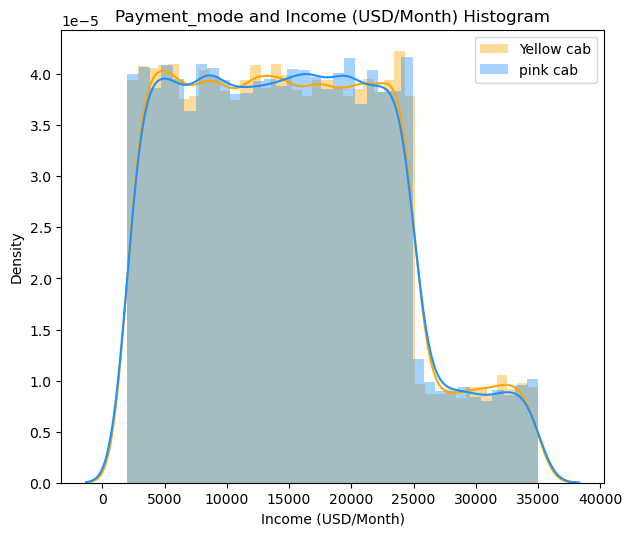

In [82]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df_1.loc[df_1.Payment_Mode=='Card', "Income (USD/Month)"] , color="orange", label="Yellow cab")
sns.distplot( df_1.loc[df_1.Payment_Mode=="Cash", "Income (USD/Month)"] , color="dodgerblue", label="pink cab")

plt.title('Payment_mode and Income (USD/Month) Histogram')
plt.legend();

In [83]:
#calculating the mean values of the incomes that prefer to pay by card and cash.
df_card=df_1[df_1["Payment_Mode"]=="Card"]
df_card["Income (USD/Month)"].mean()

15020.080253647893

In [84]:
df_cash=df_1[df_1["Payment_Mode"]=="Cash"]
df_cash["Income (USD/Month)"].mean()

15009.05489187963

In [85]:
stats.ttest_ind(df_card.dropna()["Income (USD/Month)"],df_cash.dropna()["Income (USD/Month)"])

Ttest_indResult(statistic=0.1498838667353499, pvalue=0.8808568551725295)

## Result of the hypothesis 4:

As a result of T-test, we can not reject the null hypothesis H0. 

In [86]:
#History of City dataset.
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [87]:
df_city.tail()

,City,Population,Users
15,SACRAMENTO CA,"545,776","7,044"
16,PITTSBURGH PA,"542,085","3,643"
17,WASHINGTON DC,"418,859","127,001"
18,NASHVILLE TN,"327,225","9,270"
19,BOSTON MA,"248,968","80,021"


In [88]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [89]:
df_city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [90]:
#There is no duplicate rows in this data frame.
duplicateDFRow3 = df_city[df_city.duplicated()]
print(duplicateDFRow3)

Empty DataFrame
Columns: [City, Population, Users]
Index: []


In [91]:
df_city.City.unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

In [92]:
#Change the object type to Cathegorical type.
df_city.City = pd.Categorical(df_city.City)

## Prepairing the city dataset

In [93]:
#I have changed the format of Users and Population columns.
#I have removed the commas in the data.
df_city["Population"]=df_city["Population"].str.replace(",","")
df_city["Users"]=df_city["Users"].str.replace(",", "")


In [94]:
#Secondly, I have changed object type to numerical type for Population and Users columns,
#since we will use them as numerical values later.
df_city["Population"] = pd.to_numeric(df_city["Population"])
df_city["Users"] = pd.to_numeric(df_city["Users"])

In [95]:
df_city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [96]:
df_city["Users"].describe().T

count        20.000000
mean      64520.650000
std       83499.375289
min        3643.000000
25%       11633.250000
50%       23429.000000
75%       91766.000000
max      302149.000000
Name: Users, dtype: float64

In [97]:
df_city.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,20.0,1231592.00,1.740127e+06,248968.0,608637.25,784559.0,1067041.0,8405837.0
Users,20.0,64520.65,8.349938e+04,3643.0,11633.25,23429.0,91766.0,302149.0


C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


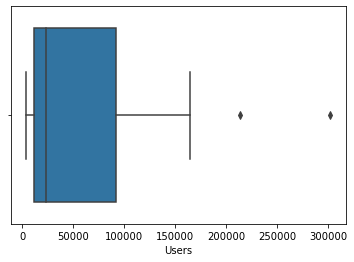

In [98]:
sns.boxplot(df_city["Users"]);

Comment: There exist two outliers. But since they won't affect the results, I ignore them.

In [99]:
#Proportion of the cab users.
df_city["Proportion"]= df_city["Users"]/df_city["Population"]*100
df_city.head()

,City,Population,Users,Proportion
0,NEW YORK NY,8405837,302149,3.594514
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279
3,MIAMI FL,1339155,17675,1.319862
4,SILICON VALLEY,1177609,27247,2.313756


C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


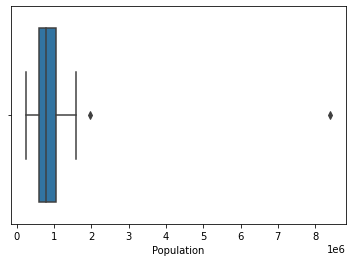

In [100]:
sns.boxplot(df_city["Population"]);

Comment: There exist two outliers. But since they won't affect the results, I ignore them.

## Conclusion (First structural results on City dataset):

There is no NA value and duplications in City data. All the features "City", "Population" and "Users" are objects. I have changed "City" from object to cathegorical. But I needed to do more for "Population" and "Users". Firstly, I've changed the format of the columns. I've deleted the commas. Since I will need to treate them as numerical values for the next stages, I have changed the types to numerical. Also, I have created a feature that represents the proportion of the cab users for each City and Population. 

Again, I will need this new "Proportion" feature to create hypothesis.

Also, I have examined the outliers in "Population" and "Users" features. But since there exist only two outlier in each, I do not have enough data how to treat them and also they will not affect my resuls, I decided to ignore them.

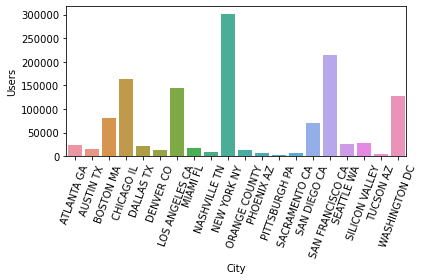

In [101]:
#Cab users in different cities.
sns.barplot(x="City", y="Users", data=df_city)
plt.xticks(rotation=70)
plt.tight_layout()

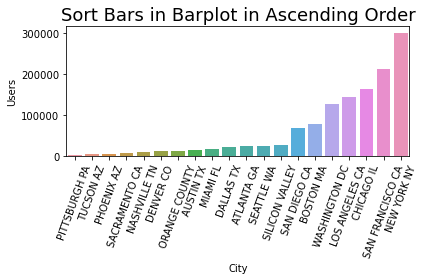

In [102]:
 #Cab users in different cities.
    
sns.barplot(x="City", y="Users", order=df_city.sort_values('Users').City, data=df_city)
plt.title("Sort Bars in Barplot in Ascending Order", size=18)
plt.xticks(rotation=70)
plt.tight_layout()

## Comment on cab users in different cities:

As seen in above, New York NY, San Francisco CA, Chicago IL, Los Angeles CA and Washington DC are the first five cities
if we take into account the number of users.

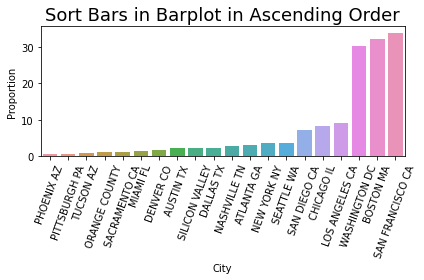

In [103]:
#Cab users' proportion in different cities.
    
sns.barplot(x="City", y="Proportion", order=df_city.sort_values('Proportion').City, data=df_city)
plt.title("Sort Bars in Barplot in Ascending Order", size=18)
plt.xticks(rotation=70)
plt.tight_layout()

## Comment on cab users' proportion in different cities:

As seen in above, San Francisco CA, Boston MA, Washington DC, Los Angeles CA and Chicago IL are the first five cities
if we take into account the proportion of cab users.

In [104]:
#History of the Cab Dataset.
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [105]:
#Examining df_cab datset and types of variables.
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [106]:
df_cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [107]:
#There is no duplicate rows in this data frame.
duplicateDFRow4 = df_cab[df_cab.duplicated()]
print(duplicateDFRow4)

Empty DataFrame
Columns: [Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip]
Index: []


In [108]:
#change object type to categorical type.
df_cab.Company= pd.Categorical(df_cab.Company)

In [109]:
df_cab.City=pd.Categorical(df_cab.City)

In [110]:
df_cab.dtypes

Transaction ID       int64
Date of Travel       int64
Company           category
City              category
KM Travelled       float64
Price Charged      float64
Cost of Trip       float64
dtype: object

In [111]:
#Statistical description of dataset.
df_cab.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
Date of Travel,359392.0,4.296407e+04,307.467197,42371.0,4.269700e+04,42988.00,4.323200e+04,43465.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20


## Comment:

If we look at the "Price Charged" and "Cost" of trip features, and if we compare the max value there is a huge gap 
between the "Cost of Trip" and "Price Charged" values. So, it worths examining whether there is an outlier.

In [112]:
#Compairing the companies: 
#The following result gives that Yellow Cab company is in top.
df_cab["Company"].describe().T

count         359392
unique             2
top       Yellow Cab
freq          274681
Name: Company, dtype: object

In [113]:
df_cab["Date of Travel"].sum()

15440942326

In [114]:
#As seen below, it could be worth examining that whether there is a correlation between travel dates 
#and users. And how this relation occurs on company base.
df_cab["Date of Travel"].value_counts()

43105    2022
43084    1123
43077    1100
43449    1086
43063    1085
         ... 
42388      88
42381      86
42380      85
42374      47
42373      25
Name: Date of Travel, Length: 1095, dtype: int64

## Outlier Detection: 
As seen below, the "Cost of Trip" feature has no oulier, but on the other hand, "Price Charged" value has lots of outliers.
I have used box plot to detect outlier by visualization.

C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price Charged'>

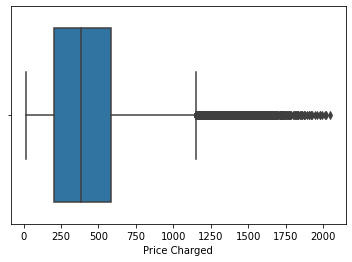

In [115]:
sns.boxplot(df_cab["Price Charged"])

C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cost of Trip'>

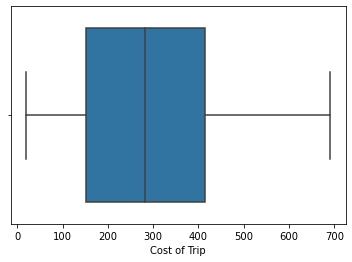

In [116]:
sns.boxplot(df_cab["Cost of Trip"])

In [117]:
Q1= df_cab["Price Charged"].quantile(0.25)

In [118]:
#calculation of the interquantile range.
Q3= df_cab["Price Charged"].quantile(0.75)
IQR= Q3- Q1

In [119]:
lower_bound=Q1- 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [120]:
(df_cab["Price Charged"]< lower_bound) | (df_cab["Price Charged"]> upper_bound)

0         False
1         False
2         False
3         False
4         False
          ...  
359387    False
359388    False
359389    False
359390    False
359391    False
Name: Price Charged, Length: 359392, dtype: bool

In [121]:
df_outlier= (df_cab["Price Charged"]< lower_bound) | (df_cab["Price Charged"]> upper_bound)

In [122]:
df_outlier.head()

0    False
1    False
2    False
3    False
4    False
Name: Price Charged, dtype: bool

In [123]:
df_cab[df_outlier].index

Int64Index([   233,    234,    237,    240,    247,    254,    504,    508,
               509,    510,
            ...
            356044, 356081, 356106, 356167, 356175, 356234, 356286, 356292,
            356303, 356315],
           dtype='int64', length=5958)

## As a next step, I should decide how to act on outliers!

I have preferred to correct the outliers. The reason for that is:  
1) I needed more information on data set.

2) It can be the cab company's policy. 

So, ignoring the outliers can change the structure of the data and the hypotheses.

While correcting the data, instead of taking the mean value, I suppressed the outlier with the upper bound value.


In [124]:
df_price=df_cab["Price Charged"]

In [125]:
#Since there is no outlier in lower bound, I have assigned it to its upper bound.
df_price[df_outlier]=upper_bound

<ipython-input-125-a19f55ba9a47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price[df_outlier]=upper_bound


In [126]:
df_price[df_outlier]

233       1149.49375
234       1149.49375
237       1149.49375
240       1149.49375
247       1149.49375
             ...    
356234    1149.49375
356286    1149.49375
356292    1149.49375
356303    1149.49375
356315    1149.49375
Name: Price Charged, Length: 5958, dtype: float64

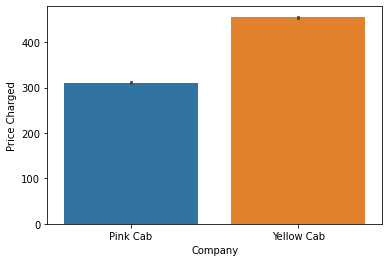

In [127]:
#Company and price charged comparison
#According to the following chart we can see that Yellow Cab's prices are much higher 
#than the Pink cab. It seems that Pink cab is more customer friendly.
sns.barplot(x="Company", y="Price Charged", data=df_cab);

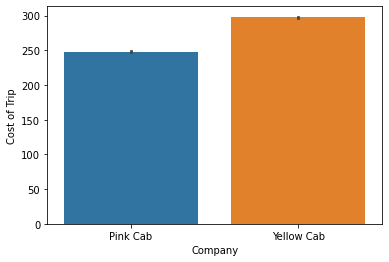

In [128]:
sns.barplot(x="Company", y="Cost of Trip", data=df_cab);

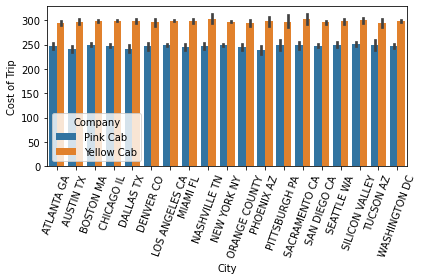

In [129]:
#To compare the cost of trip and price charged values in different companies. 
sns.barplot(x="City", y="Cost of Trip", hue="Company", data=df_cab)
plt.xticks(rotation=70)
plt.tight_layout()

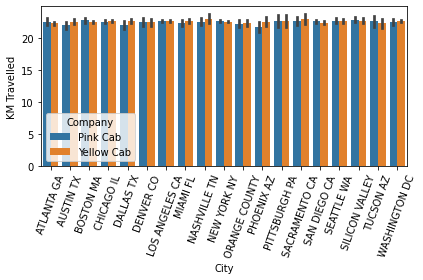

In [130]:
sns.barplot(x="City", y="KM Travelled", hue="Company", data=df_cab)
plt.xticks(rotation=70)
plt.tight_layout()

In [131]:
df_cab_yellow= df_cab[df_cab["Company"]=="Yellow Cab"]
df_cab_yellow["KM Travelled"].sum()

6199417.469999999

In [132]:
df_cab_pink= df_cab[df_cab["Company"]=="Pink Cab"]
df_cab_pink["KM Travelled"].sum()

1911073.1100000003

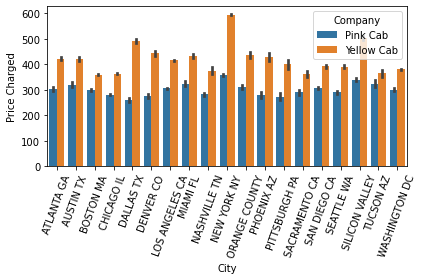

In [133]:
sns.barplot(x="City", y="Price Charged", hue="Company", data=df_cab)
plt.xticks(rotation=70)
plt.tight_layout()

## Question 

As in the above graph, the cost of trips are much more higher in Yellow cab. It seems that Pink cab looks more customer friendly. Will being customer friendly help to increase the Pink cab's margin? 

In [134]:
df_cab["Margin"]=df_cab["Price Charged"]-df_cab["Cost of Trip"]
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Margin
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


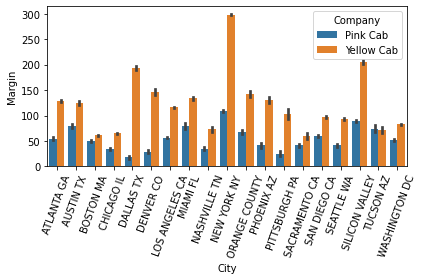

In [135]:
#Does margin proportionally increase with increase in number of customers?
sns.barplot(x="City", y="Margin", hue="Company", data=df_cab)
plt.xticks(rotation=70)
plt.tight_layout()

In [136]:
df_cab.groupby(["KM Travelled", "Company"])["Price Charged"].mean()

KM Travelled  Company   
1.90          Pink Cab       26.504868
              Yellow Cab     38.801939
1.92          Pink Cab       27.175250
              Yellow Cab     37.771153
1.94          Pink Cab       26.616400
                               ...    
47.20         Yellow Cab    927.491430
47.60         Pink Cab      661.981184
              Yellow Cab    916.451045
48.00         Pink Cab      646.058471
              Yellow Cab    919.657607
Name: Price Charged, Length: 1748, dtype: float64

## Hypothesis 5

H0: The margin of Yellow cab and Pink cab are equal.

H1: The margin of Yellow cab and Pink cab are not equal.

C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


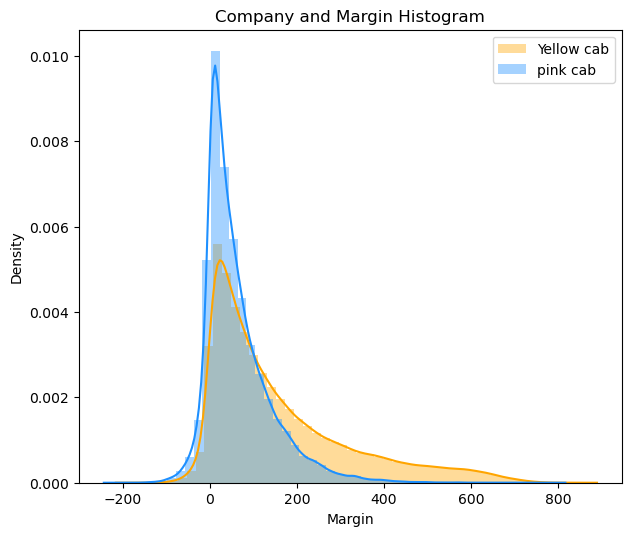

In [137]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df_cab.loc[df_cab.Company=='Yellow Cab', "Margin"] , color="orange", label="Yellow cab")
sns.distplot( df_cab.loc[df_cab.Company=="Pink Cab", "Margin"] , color="dodgerblue", label="pink cab")

plt.title('Company and Margin Histogram')
plt.legend();

In [138]:
#ANOVA TEST
mod3= ols('(df_cab["Margin"] ~ df_cab["Company"])', data=df_cab).fit()
aov_table3= sm.stats.anova_lm(mod3, typ=2)
print(aov_table3)

                         sum_sq        df             F  PR(>F)
df_cab["Company"]  5.787707e+08       1.0  27216.360468     0.0
Residual           7.642623e+09  359390.0           NaN     NaN


## Result of Hypothesis 5:

Since the p value is less than 0.05, then we can reject the null hypothesis.
Hence, there exists a difference between the margins of Yellow and Pink cab.

## Question :  Does margin proportionally increase with increase in number of customers?

Yes, as seen above computations, as Yellow cab users increase, then so is the margin of Yellow cab's company. 

## Questions:
¶

## Which company has maximum cab users at a particular time period?

In [139]:
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Margin
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [140]:
df_city.head()

,City,Population,Users,Proportion
0,NEW YORK NY,8405837,302149,3.594514
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279
3,MIAMI FL,1339155,17675,1.319862
4,SILICON VALLEY,1177609,27247,2.313756


In [141]:
df_cab["Users"]=df_city["Users"]
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Margin,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,302149.0
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,164468.0
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,144132.0
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,17675.0
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,27247.0


In [142]:
Travel= df_cab["Date of Travel"]

In [143]:
df_cab["Date of Travel"].unique()

array([42377, 42375, 42371, ..., 43461, 43464, 43460], dtype=int64)

In [144]:
Travel.index

RangeIndex(start=0, stop=359392, step=1)

In [145]:
#changing to time index.
Travel.index=pd.DatetimeIndex(Travel.index)


In [146]:
#Maximum value of Users column.
max_col= df_cab["Users"].max()
index_max= df_cab["Users"].idxmax()

In [147]:
index_max= df_cab["Users"].idxmax()
index_max

0

## Question: 

What is the relation between "Price Charged" and "Payment Mode"? 

In [148]:
df_cab["Payment_Mode"]=df_1["Payment_Mode"]
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Margin,Users,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,302149.0,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,164468.0,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,144132.0,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,17675.0,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,27247.0,Card


## Hypothesis 6

H0: The mean value of the charged price of the card users and cash users are equal.

H1: The mean value of the charged price of the card users and cash users are not equal.


C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


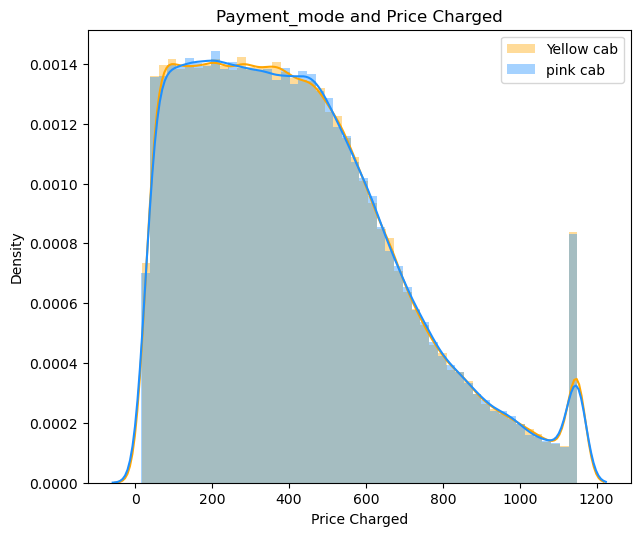

In [149]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df_cab.loc[df_cab.Payment_Mode=='Card', "Price Charged"] , color="orange", label="Yellow cab")
sns.distplot( df_cab.loc[df_cab.Payment_Mode=="Cash", "Price Charged"] , color="dodgerblue", label="pink cab")

plt.title('Payment_mode and Price Charged')
plt.legend();

In [150]:
df_cab_card=df_cab[df_cab["Payment_Mode"]=="Card"]
df_cab_card["Price Charged"].mean()

420.9645046441015

In [151]:
df_cab_cash=df_cab[df_cab["Payment_Mode"]=="Cash"]
df_cab_cash["Price Charged"].mean()

421.23256185261295

In [152]:
stats.ttest_ind(df_cab_card.dropna()["Price Charged"],df_cab_cash.dropna()["Price Charged"])

Ttest_indResult(statistic=0.4670375055309384, pvalue=0.6460767187616798)

## Result of the hypothesis 6:

As a result of T-test, we can not reject the null hypothesis H0. 

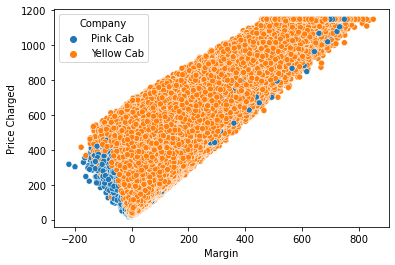

In [153]:
sns.scatterplot(x="Margin", y="Price Charged",hue="Company", data=df_cab);

C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


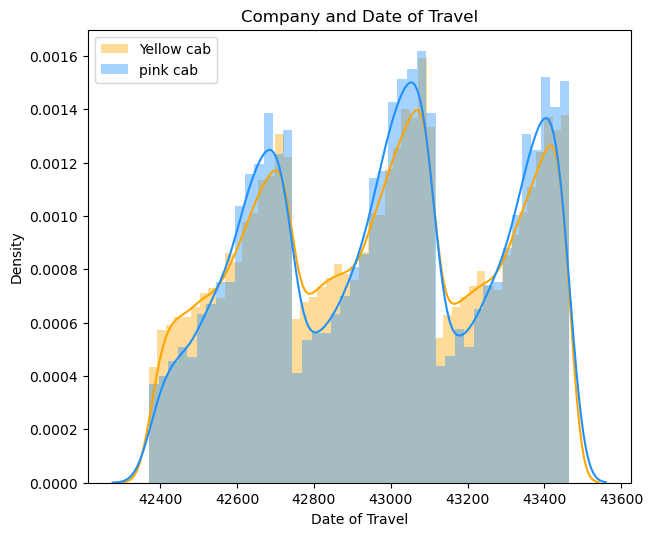

In [154]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df_cab.loc[df_cab.Company=='Yellow Cab', "Date of Travel"] , color="orange", label="Yellow cab")
sns.distplot( df_cab.loc[df_cab.Company=="Pink Cab", "Date of Travel"] , color="dodgerblue", label="pink cab")

plt.title('Company and Date of Travel')
plt.legend();

## “Is there any seasonality in number of customers using the cab service?”

In the above graph. there are seasonalities (3) in number of customers using the cab service. 

In [155]:
#we should visualize it to see clearly!
df_cab.groupby(["Cost of Trip", "Company"])["Price Charged"].mean()

Cost of Trip  Company   
19.000        Pink Cab       27.465000
              Yellow Cab           NaN
19.190        Pink Cab       26.725000
              Yellow Cab           NaN
19.200        Pink Cab       23.730000
                               ...    
679.728       Yellow Cab    813.088571
685.440       Pink Cab             NaN
              Yellow Cab    923.638836
691.200       Pink Cab             NaN
              Yellow Cab    932.933056
Name: Price Charged, Length: 32582, dtype: float64

# Conclusion: 

If we take into consider the margin rates and customer preferences, I would recommend to invest on Yellow Cab company. 